<a href="https://colab.research.google.com/github/kjxeez/machine-learning/blob/main/Poly_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 2


### Дисциплина: Методы машинного обучения

##### Студент:  Акопян Изабелла Арменовна
##### Группа:   НБИ-01-20

## Москва 2023
***

### Вариант № 11

Лабораторная работа 2 – Вариант 11 

1. Набор данных: forest_fires 

2. Независимая переменная: features/FFMC 

3. Зависимая переменная: features/DMC 

4. Доп. признак: имеющий максимальную дисперсию 

5. Визуализация доп. признака – столбчатая диаграмма 

6. Показатель качества регрессии – MAE (mean absolute error) 

7. Степень полинома: 4 

8. Параметры глубокой нейронной сети: кол-во скрытых слоев – 4, кол-во нейронов в скрытом слое – 64, функция активации – сигмоида. 

В соответствии с индивидуальным заданием, указанным в записной книжке команды, выполните следующие работы:  

1. Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимый признак и зависимый признак (отклик). 

2. Решите задачу полиномиальной регрессии для степени полинома, указанной в индивидуальном задании, при помощи нейронной сети с одним нейроном и оцените качество полученной модели по показателю, указанному в индивидуальном задании.  
3. Постройте кривые обучения с зависимостью от количества эпох. 
4. Визуализируйте точки набора данных на плоскости в виде диаграммы рассеяния (ось X – независимый признак, ось Y – зависимый признак), а также линию регрессии (другим цветом), подписывая оси и рисунок.  
5. Определите в исходном наборе данных признак (отличный от независимого и зависимого признаков), принимающий непрерывные значения и имеющий свойства, указанные в индивидуальном задании.  
6. Визуализируйте этот признак в соответствии с индивидуальным заданием.  
7. Сформируйте набор входных данных из двух признаков набора данных (независимый признак и определенный признак), создайте и адаптируйте нормализующий слой Tensorflow для двух признаков.  
8. Используя созданный нормализующий слой, постройте нейронную сеть (нелинейный регресор) с количеством скрытых слоев, количеством нейронов и функцией активации, указанными в индивидуальном задании, и одним нейроном в выходном слое и обучите ее на наборе данных из двух признаков и отклика.  
9. Визуализируйте набор данных в виде точечного графика и прогноз нейронной сети в виде поверхности в трехмерном пространстве. 
10. Разбейте набор данных из двух признаков и отклика на обучающую и тестовую выборки и постройте кривые обучения для заданного показателя качества в зависимости от количества точек в обучающей выборке, подписывая оси и рисунок и создавая легенду. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds

Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимый признак и зависимый признак (отклик).



In [ ]:
ds = tfds.load("forest_fires", split='train')
df = tfds.as_dataframe(ds)
df

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/forest_fires/0.0.1.incompleteZYJGKJ/forest_fires-train.tfrecord*...:   0%|…

Dataset forest_fires downloaded and prepared to /root/tensorflow_datasets/forest_fires/0.0.1. Subsequent calls will reuse this data.


,area,features/DC,features/DMC,features/FFMC,features/ISI,features/RH,features/X,features/Y,features/day,features/month,features/rain,features/temp,features/wind
0,10.820000,671.200012,181.100006,96.099998,14.300000,63.000000,7,5,1,7,6.400000,27.299999,4.900000
1,24.590000,750.500000,96.699997,90.500000,11.400000,55.000000,3,4,6,8,0.000000,20.600000,5.400000
2,0.170000,607.099976,131.699997,94.300003,22.700001,55.000000,6,5,1,7,0.000000,19.400000,4.000000
3,14.680000,671.200012,181.100006,96.099998,14.300000,27.000000,3,4,1,7,0.000000,32.299999,2.200000
4,88.489998,699.599976,133.300003,92.900002,9.200000,21.000000,4,4,2,8,0.000000,26.400000,4.500000
5,5.180000,714.299988,84.099998,89.599998,5.700000,35.000000,3,4,6,8,0.000000,23.799999,3.600000
6,9.960000,855.299988,290.000000,90.300003,7.400000,58.000000,2,5,4,8,0.000000,16.200001,3.600000
7,2.070000,596.299988,135.500000,95.000000,21.299999,28.000000,2,4,0,7,0.000000,30.600000,3.600000
8,5.970000,745.299988,99.000000,92.099998,9.600000,50.000000,7,4,4,8,0.000000,18.700001,2.200000
9,0.750000,503.600006,91.599998,92.199997,9.600000,70.000000,2,4,2,7,0.000000,20.700001,2.200000


Решите задачу полиномиальной регрессии для степени полинома, указанной в индивидуальном задании, при помощи нейронной сети с одним нейроном и оцените качество полученной модели по показателю, указанному в индивидуальном задании.

Независимая переменная: features/FFMC

Зависимая переменная: features/DMC

array([181.1,  96.7, 131.7, 181.1, 133.3,  84.1, 290. , 135.5,  99. ,
        91.6, 175.1,  56.7,  25.7, 203.2, 235.1, 139.4, 147.3, 137. ,
        51.3, 145.4,  56.4, 104.2, 129.5, 109.2, 103.2, 112.4,  27.5,
        96.9, 104.2,  99.6,   1.1,  81.8, 175.5, 129.5,  96.2,  88.9,
       124.1, 137. ,  62.3,  73.4,  75.6,  88.8,  17.2, 139.4,  37.6,
        35.8, 105.8,   4.4,  60.6,  27.4, 180.4,  93.3,  50.1, 130.3,
       131.7, 287.2, 101.3, 207. ,  70.8,  17.3,   3.7, 124.1,  19.5,
        41.9,  96.9,  85.1, 121.1, 141.3, 231.1, 102.3,  80.9, 101.3,
       164.1, 108.4, 111.7, 129.5,  35.8, 122. ,  61.1, 139.4,  51.2,
       276.3,  23.9, 227. ,  87.7, 131.7, 133.3,  39.7, 129.5,   7.3,
       142.4, 222.4,  18.9, 121.1,  99.9, 126.5, 112.4,  35.8, 117.9,
        77. ,  48.5,  13.2,  52.2, 142.4, 276.3,  96.2, 238.2,  99.6,
       137. , 266.2, 121.2,   9.1,  43.7,  25.7,  19.5,  56.7,  27.9,
       181.3,  85.3, 181.1, 175.5,  25.4, 191.4,  84.1, 102.2,  73.4,
       126.5,  78.5,

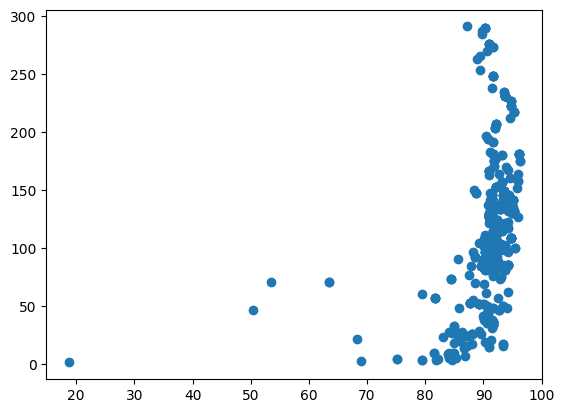

In [ ]:

x = np.array(df['features/FFMC']) # вектор
y =  np.array(df['features/DMC'])
m=len(y)
X = x.reshape(-1, 1)  
plt.scatter(x, y);
y

In [ ]:
#1 способ
X2 = np.hstack([X, X**2]) # соединение массивов по горизонтали
X2.shape


(517, 2)

In [ ]:
def J(x_):
    return (x_-2.5)**2 - 1.

def dJ(x_):
    return 2*(x_-2.5)

In [ ]:
def gradient_descent(initial_x, eta, n_iters = 1e4, epsilon=1e-8):
    x_ = initial_x
    x_history = [initial_x]
    i_iter = 0

    while i_iter < n_iters:
        gradient = dJ(x_)
        last_x_ = x_
        x_ -= eta * gradient
        x_history.append(x_)
    
        if(abs(J(x_) - J(last_x_)) < epsilon):
            break
        i_iter += 1
        
    return x_history
            
def plot_history(plot_x, x_history):
    plt.plot(plot_x, J(plot_x))
    plt.plot(np.array(x_history), J(np.array(x_history)), color="r", marker='+')
    plt.text(1., 10., f'Кол-во шагов: {len(x_history)}', fontsize=14, color='r')

In [ ]:
class RegressionSGD:

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        self._theta = None

    def fit(self, X_train, y_train, n_iters=50, t0=5, t1=50):
        assert X_train.shape[0] == y_train.shape[0], \
            "Размер X_train должен быть равен размеру y_train"
        assert n_iters >= 1

        def dJ_sgd(theta, X_b_i, y_i):
            return X_b_i * (X_b_i.dot(theta) - y_i) * 2.

        def sgd(X_b, y, initial_theta, n_iters=5, t0=5, t1=50):

            def learning_rate(t): #определяется шаг для момента t
                return t0 / (t + t1)

            theta = initial_theta
            m = len(X_b)
            for i_iter in range(n_iters):
                indexes = np.random.permutation(m)
                X_b_new = X_b[indexes,:]
                y_new = y[indexes]
                for i in range(m):
                    gradient = dJ_sgd(theta, X_b_new[i], y_new[i])
                    theta = theta - learning_rate(i_iter * m + i) * gradient

            return theta

        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        initial_theta = np.random.randn(X_b.shape[1])
        self._theta = sgd(X_b, y_train, initial_theta, n_iters, t0, t1)

        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]

        return self

    def predict(self, X_predict):
        assert self.intercept_ is not None and self.coef_ is not None, \
            "Нужно обучить модель перед использованием!"
        assert X_predict.shape[1] == len(self.coef_), \
            "Кол-во признаков в X_predict должно быть равно кол-ву признаков в X_train"

        X_b = np.hstack([np.ones((len(X_predict), 1)), X_predict])
        return X_b.dot(self._theta)

    def score(self, X_test, y_test):
        y_predict = self.predict(X_test)
        return r2_score(y_test, y_predict)

    def __repr__(self):
        return "RegressionSGD()"

In [ ]:
try:
    hist = gradient_descent(0., 1.1) # скорость 1.1
    plot_history(plot_x, hist)
except Exception as e: 
    print(f"{type(e).__name__}: {e}")

OverflowError: (34, 'Numerical result out of range')


In [ ]:
reg = RegressionSGD()
reg.fit(X, y, n_iters=2)
reg.coef_, reg.intercept_

<ipython-input-44-cb1c5470f550>:14: RuntimeWarning: overflow encountered in multiply
  return X_b_i * (X_b_i.dot(theta) - y_i) * 2.
<ipython-input-44-cb1c5470f550>:29: RuntimeWarning: invalid value encountered in subtract
  theta = theta - learning_rate(i_iter * m + i) * gradient


(array([nan]), nan)

Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимый признак и зависимый признак (отклик).

